# Freestyle python exercises

Trying some basic Python programming and plot

![img](https://o.aolcdn.com/images/dims?quality=85&image_uri=http%3A%2F%2Fo.aolcdn.com%2Fhss%2Fstorage%2Fmidas%2F196d822091dd62d7ab7eac6e7ecdda3f%2F203421819%2Fpythonbootcamp_editorial.jpg&client=amp-blogside-v2&signature=b49b56f1df65b7a855aee2d6b5b85b34f56196f3)

In [191]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import geopandas as geo
from geopandas import GeoDataFrame
from shapely.geometry import Point

In [192]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 8]

## Let's cook the data!

Loading CSV file locally with Pandas

In [193]:
estate = pd.read_csv("data/Sacramentorealestatetransactions.csv", sep=",")

How can you view the data you just loaded?

In [194]:
estate[:5]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [195]:
len(estate)

985

## Explore the data

### How many property types are there?

List the unique "type" of the properties from the dataframe.

In [196]:
estate["type"].unique()

array(['Residential', 'Condo', 'Multi-Family', 'Unkown'], dtype=object)

In [197]:
len(set(estate["city"]))

39

### Find date range of the data (sale dates)

The column "sale_date" represents the date of each record in the dataframe. Let's find out the bounding range.

In [198]:
estate.agg({"sale_date": ["min","max"]})

,sale_date
min,Fri May 16 00:00:00 EDT 2008
max,Wed May 21 00:00:00 EDT 2008


In [199]:
df["dt"] = pd.to_datetime(df["sale_date"])

In [200]:
import datetime
len(df[df["dt"] <= "2008-05-18"])

382

In [201]:
df.groupby("dt").agg({"price": ["min","max"]})

price        
              min     max
dt                       
2008-05-15  56950  235738
2008-05-16   1551  884790
2008-05-19   4897  760000
2008-05-20  69000  839000
2008-05-21  59222  830000

### How many properties are smaller than 60 m^2 ?

Given 10.764 sq ft = 1 sqm

In [202]:
estate["sq_m"] = estate["sq__ft"] / 10.764

In [203]:
estate[(estate["sq_m"] < 60.) & (estate["sq_m"] > 0.)].sort_values(by="sq_m", ascending=False)[:5]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,sq_m
354,3715 TALLYHO DR Unit 78HIGH,SACRAMENTO,95826,CA,1,1,625,Condo,Mon May 19 00:00:00 EDT 2008,100000,38.544627,-121.357960,58.063917
338,4030 BROADWAY,SACRAMENTO,95817,CA,2,1,623,Residential,Mon May 19 00:00:00 EDT 2008,62050,38.546798,-121.460038,57.878112
868,9127 NEWHALL DR Unit 34,SACRAMENTO,95826,CA,1,1,611,Condo,Thu May 15 00:00:00 EDT 2008,60000,38.542419,-121.359904,56.763285
168,5028 14TH AVE,SACRAMENTO,95820,CA,2,1,610,Residential,Tue May 20 00:00:00 EDT 2008,93675,38.539420,-121.446894,56.670383
18,250 PERALTA AVE,SACRAMENTO,95833,CA,2,1,588,Residential,Wed May 21 00:00:00 EDT 2008,120000,38.612099,-121.469095,54.626533


In [204]:
len(estate[(estate["sq_m"] < 60.) & (estate["sq_m"] > 0.)])

7

### Find the highest, lowest, mean prices of properties in each city

Aggregations come into play.

In [205]:
price_by_state = estate.groupby("city").agg({"price": ["min","max","mean","std","count"]})

In [206]:
price_by_state[:10]

price                                            
                    min     max           mean            std count
city                                                               
ANTELOPE         115000  408431  232496.393939   71963.663914    33
AUBURN           260000  560000  405890.800000  131800.852134     5
CAMERON PARK     119000  425000  267944.444444  115064.776443     9
CARMICHAEL       139500  668365  295684.750000  142134.046072    20
CITRUS HEIGHTS    30000  305000  187114.914286   58423.361610    35
COOL             300000  300000  300000.000000            NaN     1
DIAMOND SPRINGS  216033  216033  216033.000000            NaN     1
EL DORADO        205000  289000  247000.000000   59396.969620     2
EL DORADO HILLS  235738  879000  491698.956522  162001.012744    23
ELK GROVE         71000  510000  271157.692982   91511.950277   114

In [207]:
price_by_state["price"]["mean"].sort_values(ascending=False)[:5]

city
GRANITE BAY        678733.333333
WILTON             617508.400000
LOOMIS             567000.000000
PENRYN             506688.000000
EL DORADO HILLS    491698.956522
Name: mean, dtype: float64

### Find how much each property is more expensive than average price of the city

Using the mean price of each city we figured out earlier.

In [208]:
mean_city_price = price_by_state["price"]["mean"]
estate_price = estate[["street","type","city", "price","latitude","longitude"]]

In [209]:
estate_price[:5]

,street,type,city,price,latitude,longitude
0,3526 HIGH ST,Residential,SACRAMENTO,59222,38.631913,-121.434879
1,51 OMAHA CT,Residential,SACRAMENTO,68212,38.478902,-121.431028
2,2796 BRANCH ST,Residential,SACRAMENTO,68880,38.618305,-121.443839
3,2805 JANETTE WAY,Residential,SACRAMENTO,69307,38.616835,-121.439146
4,6001 MCMAHON DR,Residential,SACRAMENTO,81900,38.519470,-121.435768


In [210]:
estate = pd.merge(estate_price, mean_city_price, how="inner", on="city")

In [211]:
estate[:5]

,street,type,city,price,latitude,longitude,mean
0,3526 HIGH ST,Residential,SACRAMENTO,59222,38.631913,-121.434879,197735.98861
1,51 OMAHA CT,Residential,SACRAMENTO,68212,38.478902,-121.431028,197735.98861
2,2796 BRANCH ST,Residential,SACRAMENTO,68880,38.618305,-121.443839,197735.98861
3,2805 JANETTE WAY,Residential,SACRAMENTO,69307,38.616835,-121.439146,197735.98861
4,6001 MCMAHON DR,Residential,SACRAMENTO,81900,38.519470,-121.435768,197735.98861


In [212]:
estate["%"] = 100*(price_diff["price"] - price_diff["mean"])/price_diff["mean"]

In [213]:
estate[["street","city","price","%"]].sort_values(by="%", ascending=False)[:10]

,street,city,price,%
821,408 KIRKWOOD CT,LINCOLN,512000,430.354158
819,1456 EAGLESFIELD LN,LINCOLN,436746,352.402455
880,1536 STONEY CROSS LN,LINCOLN,433500,349.040093
879,1515 EL CAMINO VERDE DR,LINCOLN,400000,314.339186
878,201 KIRKLAND CT,LINCOLN,389000,302.944858
877,1965 LAURELHURST LN,LINCOLN,350000,262.546788
151,1409 47TH ST,SACRAMENTO,699000,253.501659
818,2251 LAMPLIGHT LN,LINCOLN,330000,241.829828
876,1440 EMERALD LN,LINCOLN,330000,241.829828
76,4004 CRESTA WAY,SACRAMENTO,660000,233.778390


### A more complex calculations

How many properties in each city is more expensive than city's average by at least 25%?

In [214]:
city_count = estate.groupby("city").size().to_frame("c")
city_count.head()

,c
city,
ANTELOPE,33
AUBURN,5
CAMERON PARK,9
CARMICHAEL,20
CITRUS HEIGHTS,35


In [215]:
cx = estate[estate["%"] > 25][["city","%"]].groupby("city").size().to_frame("n")
cx[:10]

,n
city,
ANTELOPE,6
AUBURN,1
CAMERON PARK,3
CARMICHAEL,5
CITRUS HEIGHTS,8
EL DORADO HILLS,4
ELK GROVE,24
FAIR OAKS,2
FOLSOM,4


And how many % of properties are that expensive? 

In [216]:
cz = cx.join(city_count)
cz["%"] = 100*cz["n"] / cz["c"]
cz

,n,c,%
city,,,
ANTELOPE,6,33,18.181818
AUBURN,1,5,20.000000
CAMERON PARK,3,9,33.333333
CARMICHAEL,5,20,25.000000
CITRUS HEIGHTS,8,35,22.857143
EL DORADO HILLS,4,23,17.391304
ELK GROVE,24,114,21.052632
FAIR OAKS,2,9,22.222222
FOLSOM,4,17,23.529412


### Distance from the city centre

Let's apply a function

In [217]:
city_centre = pd.read_csv("data/city_centre.csv", sep=",")
city_centre[:5]

,Unnamed: 0,city,price,latitude,longitude
0,85,MATHER,237800.0,38.547991,-121.280483
1,106,POLLOCK PINES,280908.0,38.754850,-120.604760
2,142,GREENWOOD,395000.0,38.945357,-120.908822
3,146,RANCHO CORDOVA,430000.0,38.550617,-121.235260
4,151,ELK GROVE,510000.0,38.382530,-121.428038


In [218]:
def dist(lat1, lng1, lat2, lng2):
    r = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlng = math.radians(lng2-lng1) 
    a = math.sin(dlat/2) * math.sin(dlat/2) + \
        math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * \
        math.sin(dlng/2) * math.sin(dlng/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    return r * c

In [219]:
def find_dist(r):
    return dist(r["latitude"], r["longitude"], r["latitude_centre"], r["longitude_centre"])

In [220]:
estate = pd.merge(estate, city_centre, how="inner", on="city", suffixes=("", "_centre"))

In [221]:
estate["dist"] = dist_city.apply(find_dist, axis=1)
estate[:10]

,street,type,city,price,latitude,longitude,mean,%,Unnamed: 0,price_centre,latitude_centre,longitude_centre,dist
0,3526 HIGH ST,Residential,SACRAMENTO,59222,38.631913,-121.434879,197735.98861,-70.049964,333,699000.0,38.563244,-121.446876,7.706494
1,51 OMAHA CT,Residential,SACRAMENTO,68212,38.478902,-121.431028,197735.98861,-65.503498,333,699000.0,38.563244,-121.446876,9.479204
2,2796 BRANCH ST,Residential,SACRAMENTO,68880,38.618305,-121.443839,197735.98861,-65.165673,333,699000.0,38.563244,-121.446876,6.128191
3,2805 JANETTE WAY,Residential,SACRAMENTO,69307,38.616835,-121.439146,197735.98861,-64.949729,333,699000.0,38.563244,-121.446876,5.996800
4,6001 MCMAHON DR,Residential,SACRAMENTO,81900,38.519470,-121.435768,197735.98861,-58.581136,333,699000.0,38.563244,-121.446876,4.962394
5,5828 PEPPERMILL CT,Condo,SACRAMENTO,89921,38.662595,-121.327813,197735.98861,-54.524717,333,699000.0,38.563244,-121.446876,15.134700
6,6048 OGDEN NASH WAY,Residential,SACRAMENTO,90895,38.681659,-121.351705,197735.98861,-54.032141,333,699000.0,38.563244,-121.446876,15.547717
7,2561 19TH AVE,Residential,SACRAMENTO,91002,38.535092,-121.481367,197735.98861,-53.978029,333,699000.0,38.563244,-121.446876,4.335403
8,645 MORRISON AVE,Residential,SACRAMENTO,100309,38.637663,-121.451520,197735.98861,-49.271248,333,699000.0,38.563244,-121.446876,8.284850
9,4085 FAWN CIR,Residential,SACRAMENTO,106250,38.470746,-121.458918,197735.98861,-46.266736,333,699000.0,38.563244,-121.446876,10.338529


In [222]:
estate[estate["dist"].isnull()]

,street,type,city,price,latitude,longitude,mean,%,Unnamed: 0,price_centre,latitude_centre,longitude_centre,dist


In [223]:
dist(38.807816, -121.270008, 38.772672, -121.220232)

5.820878833941799

### Go graphical

Let's plot the geographical distribution of the price / relative price to the city average / ...

In [224]:
coords = [Point(coord) for coord in zip(estate["latitude"], estate["longitude"])]

In [225]:
gf = geo.GeoDataFrame(estate, geometry=coords)

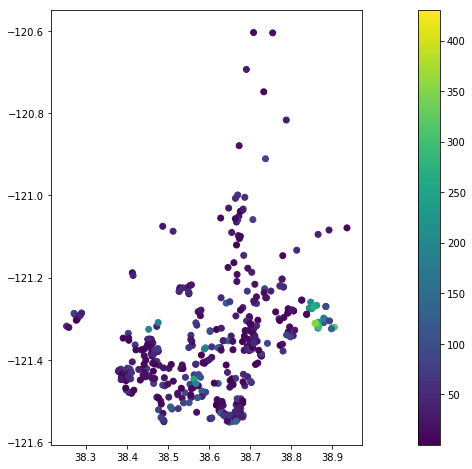

In [226]:
gf[gf["%"] > 0].plot(column="%", legend=True)

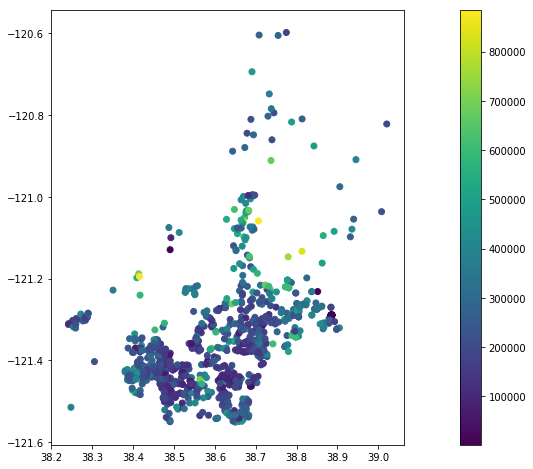

In [227]:
gf.plot(column="price", legend=True)

### Plot distance from the centre

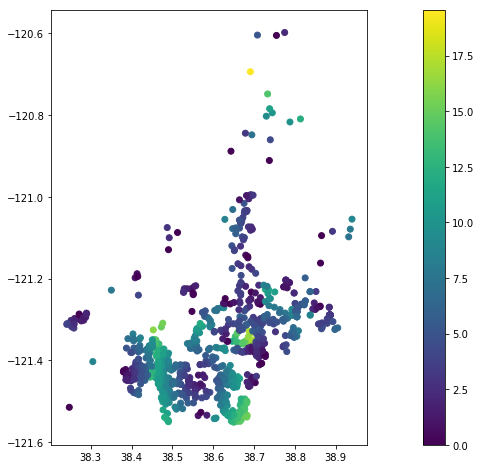

In [228]:
gf[gf["dist"]>0].plot(column="dist", legend=True)

### Plot histogram of prices by city

Can you change the following code to plot price histograms by type of properties instead of city?

In [229]:
max_price = estate["price"].max()
min_price = estate["price"].min()
(min_price, max_price)

(1551, 884790)

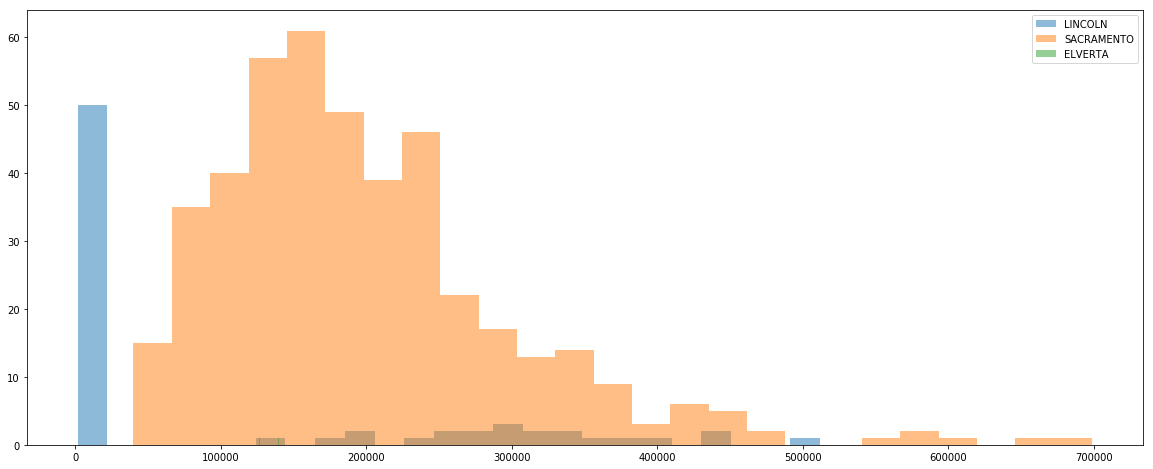

In [230]:
for city in ["LINCOLN", "SACRAMENTO", "ELVERTA"]:
    x = estate[estate["city"] == city]["price"]
    plt.hist(x, bins=25, alpha=0.5, label=city)
plt.legend(loc="upper right")
plt.show()

Try plotting the histogram of prices by each property type

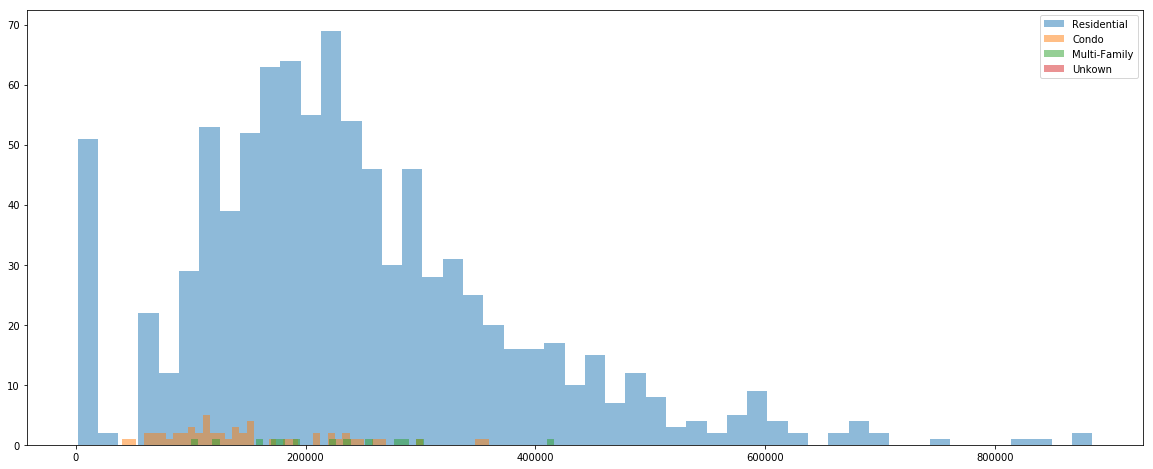

In [232]:
types = estate["type"].unique()
for ty in types:
    x = estate[estate["type"] == ty]["price"]
    plt.hist(x, bins=50, alpha=0.5, label=ty)
plt.legend(loc="upper right")
plt.show()

### Extract street names

In [233]:
dist_city["str"] = dist_city["street"].apply(lambda s: " ".join(s.split(" ")[1:]))
dist_city[["str", "street"]][:10]

,str,street
0,HIGH ST,3526 HIGH ST
1,OMAHA CT,51 OMAHA CT
2,BRANCH ST,2796 BRANCH ST
3,JANETTE WAY,2805 JANETTE WAY
4,MCMAHON DR,6001 MCMAHON DR
5,PEPPERMILL CT,5828 PEPPERMILL CT
6,OGDEN NASH WAY,6048 OGDEN NASH WAY
7,19TH AVE,2561 19TH AVE
8,MORRISON AVE,645 MORRISON AVE
9,FAWN CIR,4085 FAWN CIR


## Clustering

In [234]:
from sklearn.cluster import KMeans

In [235]:
kmeans = KMeans(n_clusters=8, max_iter=80, n_jobs=4)

In [236]:
trainset = estate[["latitude", "longitude"]].values
trainset.shape

(1002, 2)

In [237]:
cluster_kmeans = kmeans.fit_predict(trainset)

In [238]:
estate["cluster_kmeans"] = cluster_kmeans.tolist()

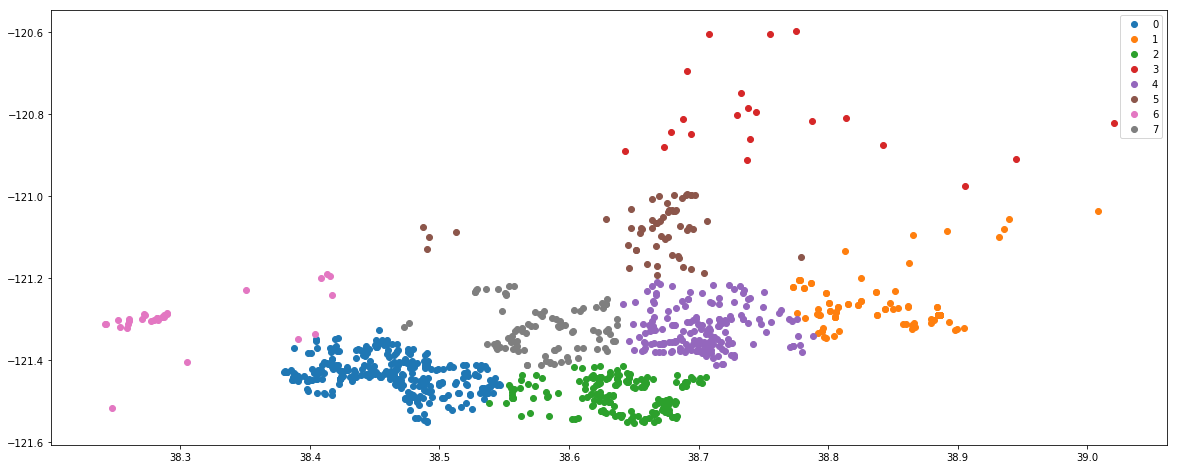

In [239]:
for i in range(8):
    subset = estate[estate["cluster_kmeans"] == i]
    lat = subset["latitude"]
    lng = subset["longitude"]
    plt.scatter(lat, lng, label=i)
plt.legend(loc="upper right")
plt.show()

### More exercises (Jupyter Notebooks)

- [Idiomic python samples](https://nbviewer.jupyter.org/github/jerry-git/learn-python3/blob/master/notebooks/intermediate/notebooks/idiomatic_misc1.ipynb)
- [Python standard library samples](https://nbviewer.jupyter.org/github/jerry-git/learn-python3/blob/master/notebooks/beginner/notebooks/std_lib.ipynb)
- [Python list samples](https://github.com/ksjpswaroop/Learn2Code/blob/master/Learn2Code%20-%20Part%203%20-%20Lists.ipynb~)
- [100 Pandas puzzles](https://github.com/ajcr/100-pandas-puzzles/blob/master/100-pandas-puzzles-with-solutions.ipynb)
- [Scipy intro samples](https://github.com/iitmcvg/Python-Exercises/blob/master/Exercise%204%20-%20Scipy.ipynb)